In [3]:
 pip install statannotations

Note: you may need to restart the kernel to use updated packages.


In [4]:
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
sns.set_style("white")

In [6]:
#loading data already available from seaborn dataset
df=sns.load_dataset("tips")

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sun vs. Thur: Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-03 U_stat=3.007e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02
Sun vs. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:3.585e-01 U_stat=3.582e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sun vs. Thur: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.609e-02 U_stat=3.007e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02
Sun vs. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.582e+03


(<AxesSubplot:xlabel='Day', ylabel='Total_bill'>,
  <statannotations.Annotation.Annotation at 0x7fe580222d60>])

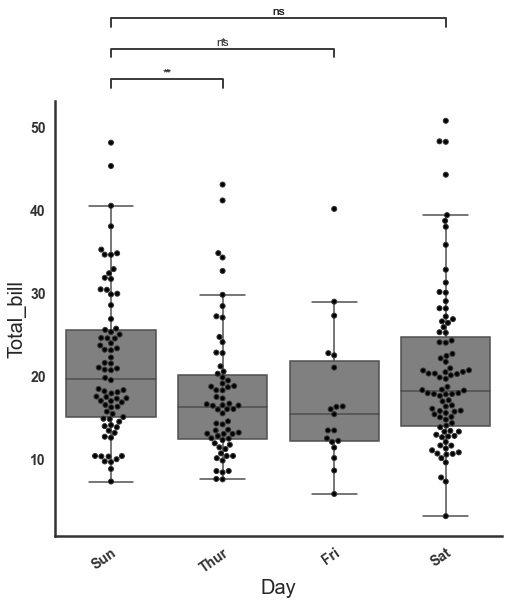

In [9]:
sns.set(rc={"figure.figsize":(8, 8)})
ax= sns.boxplot(data=df, x="day", y="total_bill", order = ["Sun", "Thur", "Fri", "Sat"], showfliers=False, color="gray")
kwargs= {"edgecolor": "0.2", "linewidth":1.0}
ax= sns.swarmplot(data=df, x="day", y="total_bill", order = ["Sun", "Thur", "Fri", "Sat"], **kwargs, color="black")
 

for axis in['bottom','left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
    
#remove spines from right and bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adding xlabel and ylabel and increasing their fontsize from default condition
ax.set_xlabel("Day", fontsize=20)
ax.set_ylabel("Total_bill", fontsize=20)

#modifying x-axis and y-axis point
plt.xticks(size=14,rotation=35,rotation_mode='anchor',ha='right',weight='bold',color='0.2')
plt.yticks(size=14,weight='bold',color='0.2')
ax.tick_params(width=2.5,color='0.2')
ax.set_facecolor("white")
plt.grid(False)

#adding significant value in the graph using Mann-Whitney test with multiple comparison correction
annot = Annotator (ax, [("Sun", "Thur"), ("Sun", "Sat"), ("Fri", "Sun")], data=df, x="day", y="total_bill", order = ["Sun", "Thur", "Fri", "Sat"]) 
annot.configure(test="Mann-Whitney", text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, results= annot.annotate()



annot.new_plot(ax, data=df, x="day", y="total_bill", order = ["Sun", "Thur", "Fri", "Sat"])
annot.configure(comparisons_correction="Bonferroni", correction_format="replace")
annot.apply_and_annotate()